In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def remove_outliers(A, B, threshold=2):
    # Identify outliers in A
    # Calculate Z-scores for array A
    z_scores_A = (A - A.mean()) / A.std()
    outliers_mask = abs(z_scores_A) > threshold
    # Remove outliers from A and corresponding elements from B
    A_cleaned = A[~outliers_mask]
    B_cleaned = B[~outliers_mask]
    return A_cleaned, B_cleaned

In [4]:
def plot_curves(sub_score, obj_score, label1='obj_score', label2='sub_score', title='Correlation between Obj. & Sub. score'):

    # Compute statistics
    score_mean = np.mean(obj_score, axis=0)
    score_std = np.std(obj_score, axis=0)
    rank_mean = np.mean(sub_score, axis=0)
    rank_std = np.std(sub_score, axis=0)
    # Plot distribution of rank across song clips
    # remove outliers
    # sub_scores, obj_score = remove_outliers(sub_score, obj_score)
    x = np.arange(len(sub_score))+1

    fig, ax1 = plt.subplots()
    ax1.plot(x, obj_score, label=label1)
    ax1.set_xlabel('song ID')
    ax1.set_ylabel(label1)
    ax1.legend(loc='upper left')

    # Plot distribution of peakBW score across song clips
    ax2 = ax1.twinx()
    ax2.plot(x, sub_score, '-r', label=label2)
    ax2.set_ylabel(label2)
    ax2.legend(loc='upper right')
    plt.title(title)

    # Mark the avg line
    ax1.axhline(y=score_mean, color='b', linestyle='--')
    ax2.axhline(y=rank_mean, color='r', linestyle='--')

    print(f'correlation coeficient = {np.corrcoef(obj_score, sub_score)[0][1]}\n')
    print(f'sub_score mean = {rank_mean}')
    print(f'sub_score std = {rank_std}')
    print(f'obj_score mean = {score_mean}')
    print(f'obj_socre std = {score_std}')


    plt.show()

correlation coeficient = 0.47976284543870573

sub_score mean = 2.327433628318584
sub_score std = 0.8992866187072676
obj_score mean = 0.6873227412274201
obj_socre std = 0.11889861468141955


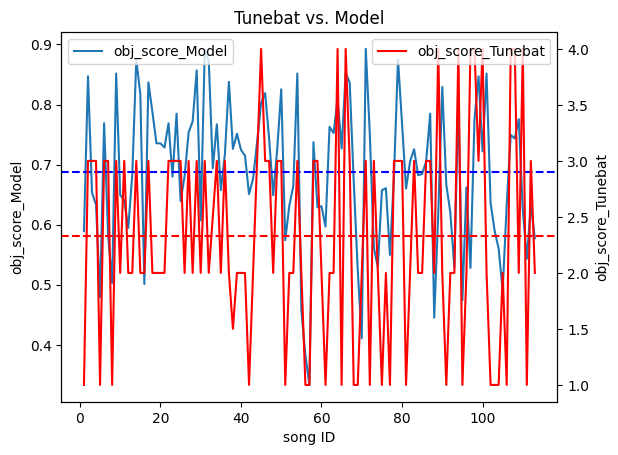

In [5]:
''' Plot obj score vs. human judges rating '''
# Load data
obj_score = np.loadtxt(f'obj_score/tonality_score_model.txt')
sub_score = np.loadtxt(f'listening_test/rank_medians.txt')

# plot_curves(sub_score=sub_score, obj_score=obj_score)
plot_curves(sub_score=sub_score, obj_score=obj_score, label1='obj_score_Model', label2='obj_score_Tunebat', title='Tunebat vs. Model')



Subjective & Objective Scores Plot

In [6]:
rating = sub_score
score = obj_score

# rating = rating[:len(score)]
rating[np.where(rating==4)] = 3

groups = {1: [], 2: [], 3: []}

for i, r in enumerate(rating):
    r = np.ceil(r) # to avoid x.5
    if r == 4:
        r = 3
    groups[r].append(score[i])


In [7]:

def plot_group(groups, means, title):
    # Scatter plot of the original groups
    plt.figure(figsize=(8, 6))
    for key, values in groups.items():
        plt.scatter([key] * len(values), values)

    # Plot horizontal lines for the mean values
    plt.hlines(means[0], 0.5, 1.5, color='b', linestyle='--', label=f"level 1 median: {means[0]:.2f}")
    plt.hlines(means[1], 1.5, 2.5, color='orange', linestyle='--', label=f"level 2 median: {means[1]:.2f}")
    plt.hlines(means[2], 2.5, 3.5, color='green', linestyle='--', label=f"level 3 median: {means[2]:.2f}")
    # plt.hlines(means[3], 3.5, 4.5, color='m', linestyle='--', label=f"Mean Group 4: {means[3]:.2f}")

    plt.xlabel("Rating")
    plt.ylabel("Score")
    plt.title(title)
    plt.legend()
    plt.grid(True)


# Create a new array based on the new groups
def quantizeScore(score, medians):
    score_rating = []
    for score_val in score:
        if score_val < medians[0]:
            score_rating.append(1)
        elif medians[0] <= score_val < medians[1]:
            score_rating.append(2)
        # elif medians[1] <= score_val < medians[2]:
        #     score_rating.append(3)
        else:
            score_rating.append(3)
    return score_rating

In [ ]:
from scipy.stats import spearmanr

medians = [np.median(groups[1]), np.median(groups[2]), np.median(groups[3])]
stds = [np.std(groups[1]), np.std(groups[2]), np.std(groups[3])]
print(f'medians: {medians}')
print(f'stds: {stds}')

medians = np.sort(medians)
score_rating = quantizeScore(score, medians)
print("score_rating:", np.shape(score_rating))

plot_group(groups, medians, "Tonality Score Categorized by Human Rating")

# Calculate Spearman's correlation coefficient
rho, p_value = spearmanr(score_rating, rating)
print(f'\ncorrelation coeficient = {np.corrcoef(score, rating)[0][1]}')
print(f"Spearman's correlation coefficient: {rho}")



Rating Level 1:
Song ID 1: Score 0.5892857142857143
Song ID 5: Score 0.4794816414686825
Song ID 8: Score 0.5031185031185031
Song ID 42: Score 0.6781818181818182
Song ID 51: Score 0.5456171735241503
Song ID 56: Score 0.38267148014440433
Song ID 57: Score 0.3333333333333333
Song ID 61: Score 0.7015706806282722
Song ID 65: Score 0.7268518518518519
Song ID 68: Score 0.673202614379085
Song ID 69: Score 0.5316901408450704
Song ID 72: Score 0.7508417508417509
Song ID 75: Score 0.6398601398601399
Song ID 77: Score 0.5496688741721855
Song ID 81: Score 0.6600985221674877
Song ID 91: Score 0.6666666666666666
Song ID 95: Score 0.44410876132930516
Song ID 102: Score 0.6359447004608295
Song ID 103: Score 0.5900900900900901
Song ID 104: Score 0.5600739371534196
Song ID 106: Score 0.5612244897959183
Song ID 111: Score 0.6869009584664537

Rating Level 2:
Song ID 10: Score 0.6496350364963503
Song ID 12: Score 0.5449330783938815
Song ID 13: Score 0.6829268292682927
Song ID 15: Score 0.8389662027833003
S

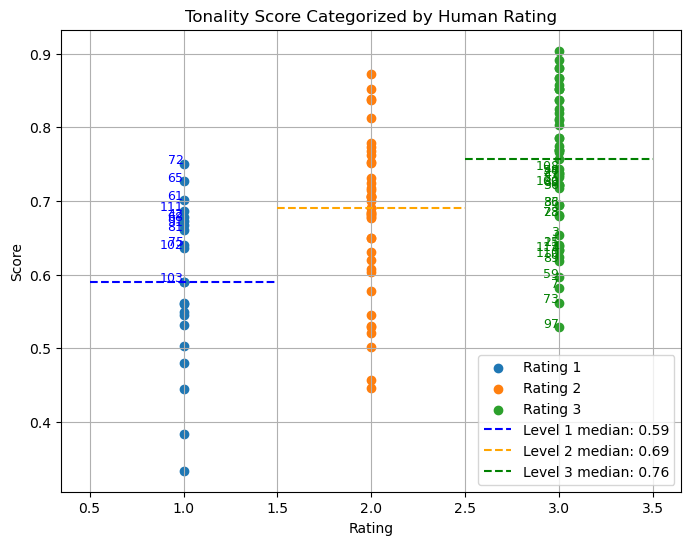

In [ ]:
def plot_group_id(groups, means, title):
    plt.figure(figsize=(8, 6))

    # Iterate over the groups and plot each rating level
    for key, values in groups.items():
        scores = [v[0] for v in values]
        song_ids = [v[1] for v in values]
        
        # Debug: Print song IDs and corresponding scores for each rating level
        print(f"\nRating Level {key}:")
        for score_val, song_id in zip(scores, song_ids):
            print(f"Song ID {song_id}: Score {score_val}")
        
        plt.scatter([key] * len(scores), scores, label=f'Rating {key}')

        # Label points based on specific conditions
        for score_val, song_id in zip(scores, song_ids):
            # Condition for rating level 1 with score above level 1 median
            if key == 1 and score_val > means[0]:
                plt.text(1, score_val, str(song_id), fontsize=9, color='blue', ha='right')
            # Condition for rating level 3 with score below level 3 median
            elif key == 3 and score_val < means[2]:
                plt.text(3, score_val, str(song_id), fontsize=9, color='green', ha='right')

    # Plot horizontal lines for the median values
    plt.hlines(means[0], 0.5, 1.5, color='b', linestyle='--', label=f"Level 1 median: {means[0]:.2f}")
    plt.hlines(means[1], 1.5, 2.5, color='orange', linestyle='--', label=f"Level 2 median: {means[1]:.2f}")
    plt.hlines(means[2], 2.5, 3.5, color='green', linestyle='--', label=f"Level 3 median: {means[2]:.2f}")

    plt.xlabel("Rating")
    plt.ylabel("Score")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

# Group structure now stores both score values and song IDs
groups = {1: [], 2: [], 3: []}
rating = sub_score
score = obj_score

# Create groups, and keep track of song IDs
for i, r in enumerate(rating):
    r = np.ceil(r)  # Ensure ratings are integers (1, 2, 3)
    if r == 4:
        r = 3
    groups[int(r)].append((score[i], i+1))  # Store both score and song ID

# Call the plot function with song IDs labeling the points
plot_group_id(groups, medians, "Tonality Score Categorized by Human Rating")
